In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [5]:
# Load dataset (ensure it's in the correct format)
df = pd.read_excel("C:\Users\sandr\Downloads\cleaned_healthcare_data_final (1).xlsx")

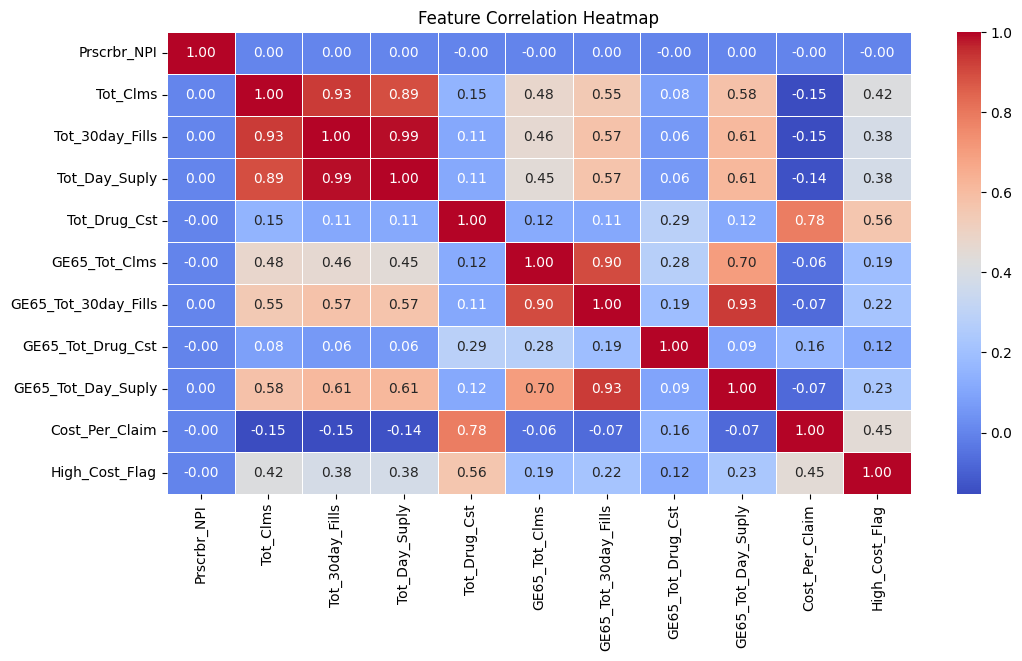

In [6]:
# Compute correlation matrix, considering only numeric columns
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
# Assuming your dataset is stored in a DataFrame called df

# 1. Average Cost Per Claim
df['Avg_Cost_Per_Claim'] = df['Tot_Drug_Cst'] / df['Tot_Clms']

# 2. Average Cost Per Day of Supply
df['Avg_Cost_Per_Day'] = df['Tot_Drug_Cst'] / df['Tot_Day_Suply']

# 3. Average Days of Supply Per Claim
df['Avg_Days_Per_Claim'] = df['Tot_Day_Suply'] / df['Tot_Clms']

# 4. Average 30-Day Fills Per Claim
df['Avg_30Day_Fills_Per_Claim'] = df['Tot_30day_Fills'] / df['Tot_Clms']

# 5. Proportion of Claims for Patients Aged 65+
df['Prop_GE65_Claims'] = df['GE65_Tot_Clms'] / df['Tot_Clms']

# 6. Proportion of Drug Costs for Patients Aged 65+
df['Prop_GE65_Drug_Cst'] = df['GE65_Tot_Drug_Cst'] / df['Tot_Drug_Cst']

# 7. Total Claims per Prescriber
prescriber_totals = df.groupby('Prscrbr_NPI').agg({
    'Tot_Clms': 'sum',
    'Tot_Drug_Cst': 'sum'
}).reset_index()
prescriber_totals.rename(columns={
    'Tot_Clms': 'Total_Claims_Per_Prescriber',
    'Tot_Drug_Cst': 'Total_Drug_Cost_Per_Prescriber'
}, inplace=True)

# Merge prescriber-level totals back into the main DataFrame
df = df.merge(prescriber_totals, on='Prscrbr_NPI', how='left')

# 8. Brand vs. Generic Prescription Ratio
df['Is_Brand'] = df['Brnd_Name'] != df['Gnrc_Name']  # 1 for brand, 0 for generic
brand_generic_ratio = df.groupby('Prscrbr_NPI')['Is_Brand'].mean().reset_index()
brand_generic_ratio.rename(columns={'Is_Brand': 'Brand_Generic_Ratio'}, inplace=True)

# Merge brand-generic ratio back into the main DataFrame
df = df.merge(brand_generic_ratio, on='Prscrbr_NPI', how='left')

# Display the updated DataFrame
print(df.head())

   Prscrbr_NPI Prscrbr_Last_Org_Name Prscrbr_First_Name Prscrbr_City  \
0   1003000126             Enkeshafi            Ardalan     Bethesda   
1   1003000126             Enkeshafi            Ardalan     Bethesda   
2   1003000126             Enkeshafi            Ardalan     Bethesda   
3   1003000126             Enkeshafi            Ardalan     Bethesda   
4   1003000126             Enkeshafi            Ardalan     Bethesda   

  Prscrbr_State_Abrvtn             Brnd_Name             Gnrc_Name  Tot_Clms  \
0                   MD   Amlodipine Besylate   Amlodipine Besylate        19   
1                   MD  Atorvastatin Calcium  Atorvastatin Calcium        11   
2                   MD               Eliquis              Apixaban        15   
3                   MD  Escitalopram Oxalate  Escitalopram Oxalate        16   
4                   MD   Hydrochlorothiazide   Hydrochlorothiazide        12   

   Tot_30day_Fills  Tot_Day_Suply  ...  Avg_Cost_Per_Claim  Avg_Cost_Per_Day  \
0     

In [8]:
# Check for missing values in the new features
print(df[['Avg_Cost_Per_Claim', 'Avg_Cost_Per_Day', 'Avg_Days_Per_Claim',
          'Avg_30Day_Fills_Per_Claim', 'Prop_GE65_Claims', 'Prop_GE65_Drug_Cst',
          'Total_Claims_Per_Prescriber', 'Total_Drug_Cost_Per_Prescriber',
          'Brand_Generic_Ratio']].isnull().sum())

# Replace infinite values with NaN and then fill NaNs
import numpy as np
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)  # Replace NaNs with 0 or another appropriate value

Avg_Cost_Per_Claim                 0
Avg_Cost_Per_Day                   0
Avg_Days_Per_Claim                 0
Avg_30Day_Fills_Per_Claim          0
Prop_GE65_Claims                   0
Prop_GE65_Drug_Cst                59
Total_Claims_Per_Prescriber        0
Total_Drug_Cost_Per_Prescriber     0
Brand_Generic_Ratio                0
dtype: int64


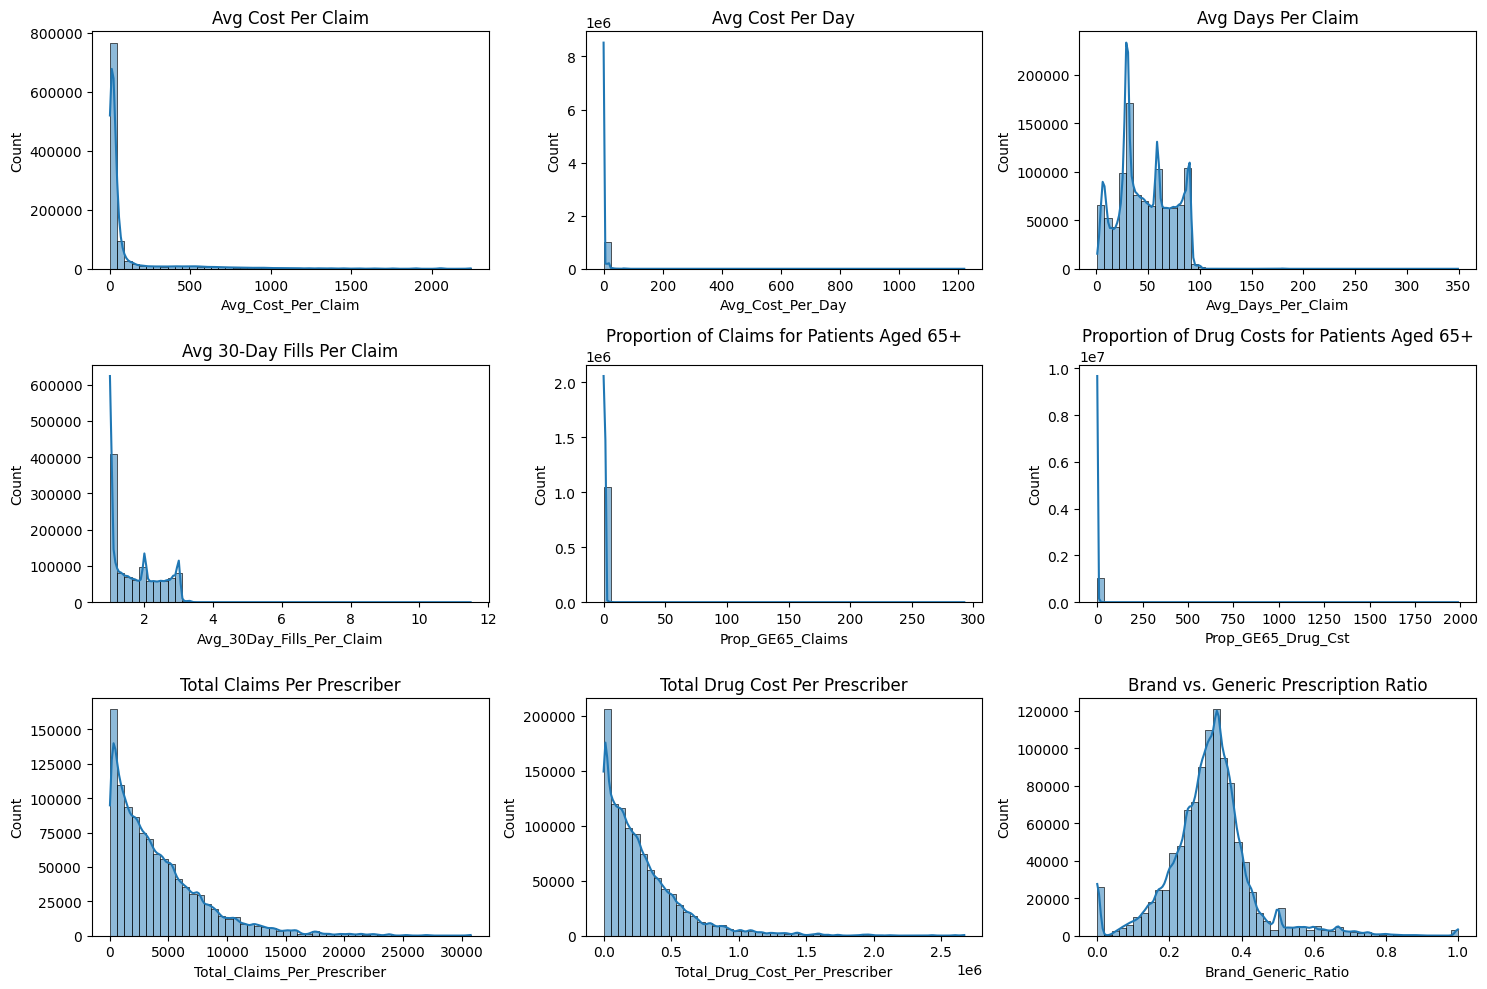

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for new features
plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
sns.histplot(df['Avg_Cost_Per_Claim'], bins=50, kde=True)
plt.title('Avg Cost Per Claim')

plt.subplot(3, 3, 2)
sns.histplot(df['Avg_Cost_Per_Day'], bins=50, kde=True)
plt.title('Avg Cost Per Day')

plt.subplot(3, 3, 3)
sns.histplot(df['Avg_Days_Per_Claim'], bins=50, kde=True)
plt.title('Avg Days Per Claim')

plt.subplot(3, 3, 4)
sns.histplot(df['Avg_30Day_Fills_Per_Claim'], bins=50, kde=True)
plt.title('Avg 30-Day Fills Per Claim')

plt.subplot(3, 3, 5)
sns.histplot(df['Prop_GE65_Claims'], bins=50, kde=True)
plt.title('Proportion of Claims for Patients Aged 65+')

plt.subplot(3, 3, 6)
sns.histplot(df['Prop_GE65_Drug_Cst'], bins=50, kde=True)
plt.title('Proportion of Drug Costs for Patients Aged 65+')

plt.subplot(3, 3, 7)
sns.histplot(df['Total_Claims_Per_Prescriber'], bins=50, kde=True)
plt.title('Total Claims Per Prescriber')

plt.subplot(3, 3, 8)
sns.histplot(df['Total_Drug_Cost_Per_Prescriber'], bins=50, kde=True)
plt.title('Total Drug Cost Per Prescriber')

plt.subplot(3, 3, 9)
sns.histplot(df['Brand_Generic_Ratio'], bins=50, kde=True)
plt.title('Brand vs. Generic Prescription Ratio')

plt.tight_layout()
plt.show()

In [10]:
# Flag prescribers with high average cost per claim
high_cost_prescribers = df[df['Avg_Cost_Per_Claim'] > df['Avg_Cost_Per_Claim'].quantile(0.95)]

# Flag prescribers with high proportion of claims for patients aged 65+
high_elderly_claims = df[df['Prop_GE65_Claims'] > df['Prop_GE65_Claims'].quantile(0.95)]

# Flag prescribers with high brand-name prescription ratio
high_brand_ratio = df[df['Brand_Generic_Ratio'] > df['Brand_Generic_Ratio'].quantile(0.95)]

# Display flagged prescribers
print("High Cost Prescribers:")
print(high_cost_prescribers[['Prscrbr_NPI', 'Prscrbr_Last_Org_Name', 'Prscrbr_First_Name', 'Avg_Cost_Per_Claim']].head())

print("\nHigh Elderly Claims Prescribers:")
print(high_elderly_claims[['Prscrbr_NPI', 'Prscrbr_Last_Org_Name', 'Prscrbr_First_Name', 'Prop_GE65_Claims']].head())

print("\nHigh Brand-Name Prescription Ratio Prescribers:")
print(high_brand_ratio[['Prscrbr_NPI', 'Prscrbr_Last_Org_Name', 'Prscrbr_First_Name', 'Brand_Generic_Ratio']].head())

High Cost Prescribers:
     Prscrbr_NPI Prscrbr_Last_Org_Name Prscrbr_First_Name  Avg_Cost_Per_Claim
91    1003000530              Semonche             Amanda         1030.274000
92    1003000530              Semonche             Amanda         1173.678905
127   1003000530              Semonche             Amanda          923.204286
145   1003000530              Semonche             Amanda         1142.287619
199   1003000902                Lohano           Jaivanti         1020.873333

High Elderly Claims Prescribers:
     Prscrbr_NPI Prscrbr_Last_Org_Name Prscrbr_First_Name  Prop_GE65_Claims
5     1003000126             Enkeshafi            Ardalan          2.000000
11    1003000126             Enkeshafi            Ardalan          2.000000
51    1003000530              Semonche             Amanda          2.136364
101   1003000530              Semonche             Amanda          2.000000
162   1003000597                   Kim                Dae          2.625000

High Brand-Name Pr

In [11]:
from sklearn.preprocessing import StandardScaler

# Select features for modeling
features = ['Avg_Cost_Per_Claim', 'Avg_Cost_Per_Day', 'Avg_Days_Per_Claim',
            'Avg_30Day_Fills_Per_Claim', 'Prop_GE65_Claims', 'Prop_GE65_Drug_Cst',
            'Total_Claims_Per_Prescriber', 'Total_Drug_Cost_Per_Prescriber',
            'Brand_Generic_Ratio']

X = df[features]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=features)

In [12]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest model
model = IsolationForest(contamination=0.01, random_state=42)  # Adjust contamination based on expected fraud rate
df['anomaly_score'] = model.fit_predict(X_scaled)

# Flag anomalies
df['is_fraud'] = df['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)

# Display potential fraud cases
fraud_cases = df[df['is_fraud'] == 1]
print(fraud_cases[['Prscrbr_NPI', 'Prscrbr_Last_Org_Name', 'Prscrbr_First_Name', 'is_fraud']].head())

     Prscrbr_NPI Prscrbr_Last_Org_Name Prscrbr_First_Name  is_fraud
435   1003001645               Trivedi              Vinod         1
438   1003001645               Trivedi              Vinod         1
457   1003002049            Srinivasan            Lakshmi         1
464   1003002049            Srinivasan            Lakshmi         1
799   1003003062              Walizada             Fatima         1


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare the Data
# Select features for modeling
features = ['Avg_Cost_Per_Claim', 'Avg_Cost_Per_Day', 'Avg_Days_Per_Claim',
            'Avg_30Day_Fills_Per_Claim', 'Prop_GE65_Claims', 'Prop_GE65_Drug_Cst',
            'Total_Claims_Per_Prescriber', 'Total_Drug_Cost_Per_Prescriber',
            'Brand_Generic_Ratio']

X = df[features]  # Features
y = df['is_fraud']  # Target variable (from Isolation Forest)

# 2. Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')  # Adjust hyperparameters as needed
rf_model.fit(X_train, y_train)

# 4. Evaluate the Model
# Predict on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    311392
           1       0.96      0.84      0.90      3181

    accuracy                           1.00    314573
   macro avg       0.98      0.92      0.95    314573
weighted avg       1.00      1.00      1.00    314573



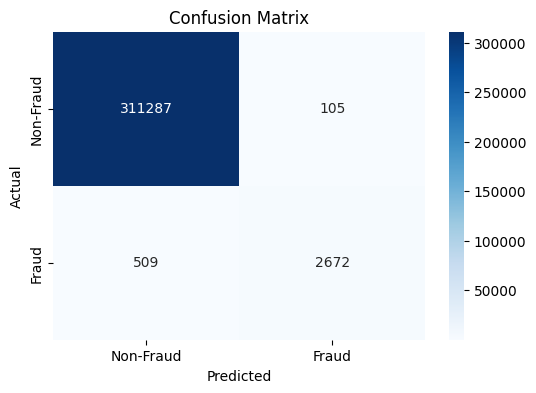

ROC-AUC Score: 1.00


In [15]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")





Feature Importance:
                          Feature  Importance
0              Avg_Cost_Per_Claim    0.340131
1                Avg_Cost_Per_Day    0.333495
7  Total_Drug_Cost_Per_Prescriber    0.083764
8             Brand_Generic_Ratio    0.071073
6     Total_Claims_Per_Prescriber    0.052712
5              Prop_GE65_Drug_Cst    0.041071
3       Avg_30Day_Fills_Per_Claim    0.030867
2              Avg_Days_Per_Claim    0.025746
4                Prop_GE65_Claims    0.021142


<ipython-input-16-c9a9c3251fe6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


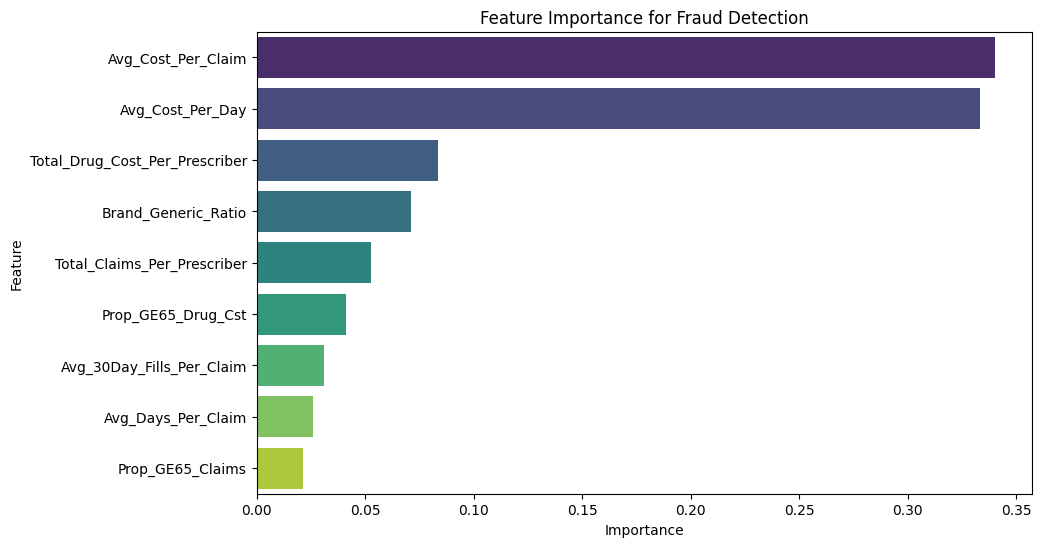

In [16]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance for Fraud Detection')
plt.show()